<a href="https://colab.research.google.com/github/ravikeerthi7606/faceDetection_YOLO/blob/main/faceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.4 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving My First Project.v1i.yolov11.zip to My First Project.v1i.yolov11.zip


In [3]:
import zipfile
import os

zip_path = "My First Project.v1i.yolov11.zip"   # change if name is different
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped successfully!")

Unzipped successfully!


In [4]:
import os

for root, dirs, files in os.walk("/content/dataset"):
    print(root)

/content/dataset
/content/dataset/valid
/content/dataset/valid/images
/content/dataset/valid/labels
/content/dataset/train
/content/dataset/train/images
/content/dataset/train/labels


In [5]:
import yaml

yaml_path = "/content/dataset/data.yaml"

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

data['train'] = "/content/dataset/train/images"
data['val']   = "/content/dataset/valid/images"
data['test']  = "/content/dataset/test/images"

with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print(data)

{'train': '/content/dataset/train/images', 'val': '/content/dataset/valid/images', 'test': '/content/dataset/test/images', 'nc': 2, 'names': ['hari', 'ravi'], 'roboflow': {'workspace': 'ravis-workspace-pn5e3', 'project': 'my-first-project-q2f4t', 'version': 1, 'license': 'MIT', 'url': 'https://universe.roboflow.com/ravis-workspace-pn5e3/my-first-project-q2f4t/dataset/1'}}


In [6]:
!pip install ultralytics

In [8]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

model.train(
    data="/content/dataset/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bdeb7f646b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [9]:
!ls runs/detect/train/weights

best.pt  last.pt


In [10]:
from google.colab import files
files.download("runs/detect/train/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")

In [15]:
results = model("/content/dataset/valid/images/WhatsApp-Image-2026-02-22-at-12-26-26-PM_jpeg.rf.73a8aa2359c5fff3bf3e55f3b25788b7.jpg", save=True)


image 1/1 /content/dataset/valid/images/WhatsApp-Image-2026-02-22-at-12-26-26-PM_jpeg.rf.73a8aa2359c5fff3bf3e55f3b25788b7.jpg: 640x640 2 haris, 8.6ms
Speed: 2.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


In [24]:
import os

test_path = "/content/dataset/valid/images"

img_name = os.listdir(test_path)[2]
img_path = os.path.join(test_path, img_name)

print("Testing on:", img_path)

results = model(img_path, save=True)

Testing on: /content/dataset/valid/images/WhatsApp-Image-2026-02-22-at-12-57-18-PM_jpeg.rf.dca218739a6ca5a12b896b7411945aea.jpg

image 1/1 /content/dataset/valid/images/WhatsApp-Image-2026-02-22-at-12-57-18-PM_jpeg.rf.dca218739a6ca5a12b896b7411945aea.jpg: 640x640 1 hari, 2 ravis, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

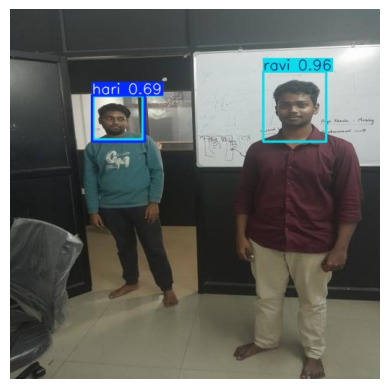

In [25]:
from PIL import Image
import matplotlib.pyplot as plt

output_path = "runs/detect/predict/" + img_name

img = Image.open(output_path)
plt.imshow(img)
plt.axis("off")